In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assume N and dx given
N = 200
dx = 0.1

# Dirichlet matrices
A = np.zeros((N, N))
for j in range(N - 1):
    A[j, j + 1] = 1
    A[j + 1, j] = -1
A1 = A / (2 * dx)

# Neumann matrices
A2 = np.copy(A)
A2[0, 0] = -4 / 3
A2[0, 1] = 4 / 3
A2[N - 1, N - 1] = 4 / 3
A2[N - 1, N - 2] = -4 / 3
A2 = A2 / (2 * dx)

# Periodic BC matrices
A3 = np.copy(A)
A3[N - 1, 0] = 1
A3[0, N - 1] = -1
A3 = A3 / (2 * dx)

# Dirichlet matrices for B
B = np.zeros((N, N))
for j in range(N):
    B[j, j] = -2
for j in range(N - 1):
    B[j, j + 1] = 1
    B[j + 1, j] = 1
B1 = B / (dx**2)

# Neumann matrices for B
B2 = np.copy(B)
B2[0, 0] = -2 / 3
B2[0, 1] = 2 / 3
B2[N - 1, N - 1] = -2 / 3
B2[N - 1, N - 2] = 2 / 3
B2 = B2 / (dx**2)

# Periodic BC matrices for B
B3 = np.copy(B)
B3[N - 1, 0] = 1
B3[0, N - 1] = -1
B3 = B3 / (dx**2)


Eigenvectors:
(200, 200)
Eigenvalues:
(200,)


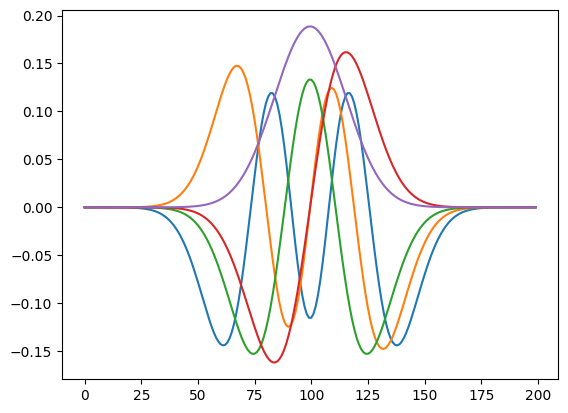

In [17]:
import numpy as np
from scipy.linalg import eig

L = 4  # domain size
N = 200  # discretization of interior
x = np.linspace(-L, L, N + 2)  # add boundary points
dx = x[1] - x[0]  # compute dx

# NOTE: Assuming B1 is computed from previous code
# Compute P matrix
P = np.zeros((N, N))
for j in range(N):
    P[j, j] = x[j + 1] ** 2  # potential x^2

# Compute linear operator
linL = -B1 + P

# Compute eigenvalues and eigenvectors
D,V = eig(linL)

sorted_indices = np.argsort(np.abs(D))[::-1] 
Dsort = D[sorted_indices]
Vsort =V[:, sorted_indices]

D5 = Dsort[N-5:N]
V5 = Vsort[:,N-5:N]

print("Eigenvectors:")
print(V.shape)
print("Eigenvalues:")
print(D.shape)

plt.plot(V5)